In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../../../Rohan/Datasets/Titanic/train.csv')
df_test = pd.read_csv('../../../Rohan/Datasets/Titanic/test.csv')

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Pclass => Imp
df_train.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [6]:
# Pclass => Imp
df_train.groupby('SibSp').mean()['Survived']

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [7]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

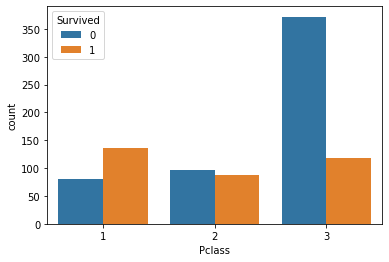

In [8]:
sb.countplot(df_train['Pclass'], hue= df_train['Survived'])

In [9]:
# Sex => Imp
df_train.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

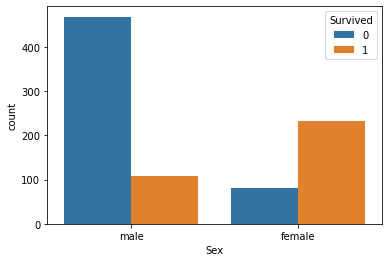

In [10]:
sb.countplot(df_train['Sex'], hue= df_train['Survived'])

In [11]:
dummy = df_train.groupby(['Pclass','Sex']).mean()['Survived']

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

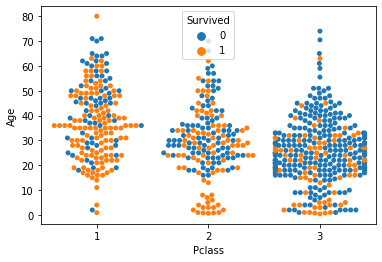

In [12]:
sb.swarmplot(data=df_train,x='Pclass',y='Age',hue='Survived')

In [15]:
dummy

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [16]:
temp = dummy.to_frame().reset_index()

In [17]:
temp

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

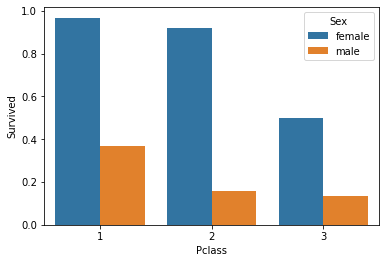

In [18]:
sb.barplot(temp['Pclass'], temp['Survived'], hue=temp['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

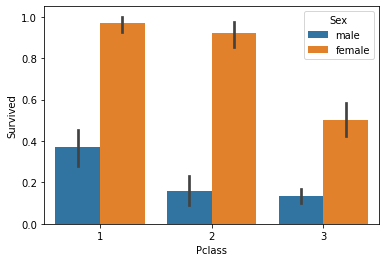

In [19]:
sb.barplot(x='Pclass', y='Survived', data=df_train, hue="Sex")

In [20]:
c0 = df_train[df_train['Survived']==0]
c1 = df_train[df_train['Survived']==1]


<AxesSubplot:xlabel='Fare', ylabel='Count'>

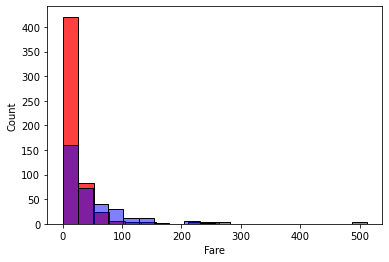

In [21]:
sb.histplot(c0['Fare'], bins=10, color='red')
sb.histplot(c1['Fare'], bins=20, color='blue', alpha=0.5)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

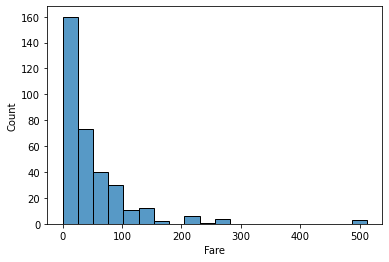

In [22]:
sb.histplot(c1['Fare'], bins=20)

In [23]:
selected_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [24]:
# 1. Missing Data
df_train[selected_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [25]:
df_train[selected_cols].isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
df_train['Age'].mean()

29.69911764705882

In [27]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [28]:
df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace=True)

In [29]:
df_train[selected_cols].isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
df_train[selected_cols].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [31]:
# Feature Encoding
df_train['Sex'] = df_train['Sex'].map({'male':0,'female':1})
df_train['Embarked'] = df_train['Embarked'].map({'S':0,'C':1,'Q':2})

In [32]:
df_train[selected_cols].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [33]:
# Model Building
X = df_train[selected_cols]
y = df_train['Survived']
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

# Working on Test data

In [34]:
# 1. Missing Data
df_test[selected_cols].isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [35]:
df_train['Fare'].mean(), df_train['Fare'].mode(), df_train['Fare'].median()

(32.2042079685746,
 0    8.05
 dtype: float64,
 14.4542)

<AxesSubplot:>

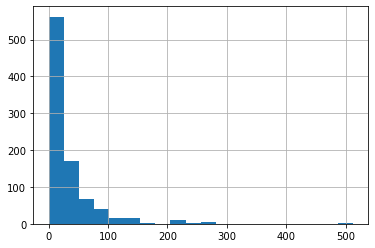

In [36]:
df_train['Fare'].hist(bins=20)

In [37]:
df_test['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_train['Fare'].median(), inplace=True)

In [38]:
df_test[selected_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [39]:
# Feature Encoding
df_test['Sex'] = df_test['Sex'].map({'male':0,'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [40]:
yp=model.predict(df_test[selected_cols])

In [41]:
df_test['Survived'] = yp

In [42]:
df_test[['PassengerId','Survived']].to_csv('submit1.csv',index=False)

# Derived Metrics

In [43]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
selected_cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [45]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [46]:
df_train['Title'] = df_train['Name'].apply(lambda X:X.split('.')[0].split(' ')[1])

In [47]:
titles = df_train['Title'].value_counts().index[:6]

In [48]:
df_train['Title'] = df_train['Title'].apply(lambda X:X if X in titles else 'other')

In [49]:
df_train['Title'].value_counts()

Mr        502
Miss      179
Mrs       121
Master     40
other      36
Dr          7
Rev         6
Name: Title, dtype: int64

In [50]:
df_train.groupby('Title').mean()['Survived']

Title
Dr        0.428571
Master    0.575000
Miss      0.703911
Mr        0.157371
Mrs       0.801653
Rev       0.000000
other     0.388889
Name: Survived, dtype: float64

In [51]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [52]:
df_train['isCabin'] = df_train['Cabin'].isna().apply(lambda X:0 if X else 1)

In [53]:
df_train.groupby('isCabin').mean()['Survived']

isCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [54]:
df_train['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [55]:
pd.get_dummies(df_train['Embarked'])

,0,1,2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
886,1,0,0
887,1,0,0
888,1,0,0
889,0,1,0


In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
ohe = OneHotEncoder()
ohe.fit(df_train[['Sex','Embarked']])

OneHotEncoder()

In [58]:
ohe.get_feature_names()

array(['x0_0', 'x0_1', 'x1_0', 'x1_1', 'x1_2'], dtype=object)

In [59]:
A = ohe.transform(df_train[['Sex','Embarked']]).toarray()
temp = pd.DataFrame(data=A, columns=)

SyntaxError: invalid syntax (Temp/ipykernel_21480/517682207.py, line 2)